In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [15]:
taxiData = pd.read_csv('TaxiWeatherStation_demo.csv')
taxiData.head()
taxiData = taxiData.drop(taxiData.columns[[0,1,2,3,4,5,10,11,12,13,14,15,16,17,18]],axis=1)
taxiData.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tip_amount,total_amount,payment_type,pickup_nyct2010_gid,dropoff_nyct2010_gid,pickup_location_id,dropoff_location_id,pickup,dropoff,prcp,snow,t_avg
0,2013-08-08 11:50:09,-73.879478,40.806896,-73.882095,40.840988,5,3.03,0.0,14.5,2,1452,1214,126,78,0101000020E610000000000060497852C0000000604867...,0101000020E610000000000040747852C000000080A56B...,0.46,0.0,75.5
1,2013-08-08 14:25:39,-73.887299,40.859505,-74.001541,40.719810,1,16.87,0.0,50.0,2,505,1808,20,211,0101000020E610000000000080C97852C000000040046E...,0101000020E610000000000040198052C0000000C0225C...,0.46,0.0,75.5
2,2013-08-08 16:07:41,-73.920647,40.860287,-73.904640,40.869423,5,1.84,0.0,12.5,2,1914,1408,127,136,0101000020E6100000000000E0EB7A52C0000000E01D6E...,0101000020E6100000000000A0E57952C000000040496F...,0.46,0.0,75.5
3,2013-08-08 17:28:13,-73.941147,40.839417,-73.987259,40.752224,5,7.68,0.0,30.5,2,911,900,244,100,0101000020E6100000000000C03B7C52C000000000726B...,0101000020E6100000000000402F7F52C0000000E04860...,0.46,0.0,75.5
4,2013-08-08 18:03:16,-73.987190,40.752079,-74.005257,40.740551,5,1.65,0.0,11.5,2,900,1359,100,158,0101000020E6100000000000202E7F52C0000000204460...,0101000020E610000000000020568052C000000060CA5E...,0.46,0.0,75.5


In [60]:
regrA = linear_model.LinearRegression(fit_intercept=False)
#X_taxiData = taxiData[['trip_distance']].values
#Y_taxiData = taxiData['total_amount'].values
#X_taxiData = X_taxiData.reshape(len(taxiData),1)
#Y_taxiData = Y_taxiData.reshape(len(taxiData),1)
Y_column = 'tip_amount'
X_column = 'trip_distance'
X_values = []
Y_values = []
for i in range(len(taxiData)):
    if int(taxiData.loc[i][[X_column]]) > 20 and int(taxiData.loc[i][[Y_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) < 50:
        X_values.append(taxiData.loc[i][[X_column]])
        Y_values.append(taxiData.loc[i][[Y_column]])
    else:
        count+=1
regrA.fit(X_values,Y_values)
print "regression coefficients", str(regrA.coef_)

regression coefficients [[0.56766345]]


TypeError: 'str' object is not callable

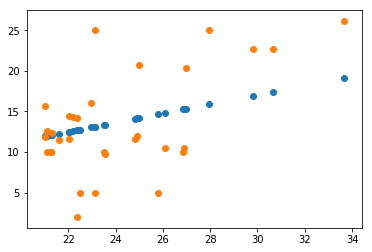

In [61]:
Y_predicted = regrA.predict(X_values)
#Y_res = (Y_predicted - Y_taxiData)
#sns.regplot(np.reshape(X_,len(Y_predicted)), np.reshape(Y_res,len(Y_res)), color="g")
plt.scatter(X_values,Y_predicted, label = 'predicted')
plt.scatter(X_values, Y_values, label = 'actual')
plt.xlabel('trip_distance')
plt.ylabel('total_amount')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.legend()
plt.show()

0


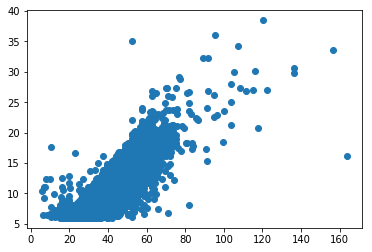

In [41]:
print count

86
